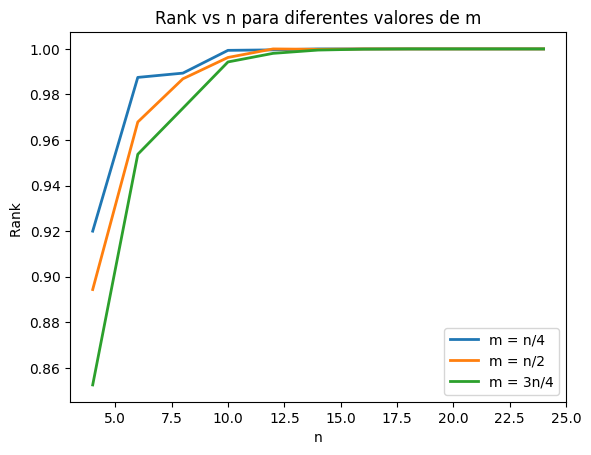

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Função para criar uma matriz de verificação de paridade aleatória
def MartizParidade(m, n):
    H = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if np.random.uniform() < 0.5: # Usada para criar uma distribuição aleatória uniforme a partir de uma densidade de probabilidade determinada.
                H[i, j] = 0
            else:
                H[i, j] = 1
    return H

n_values = np.array([i for i in range(4, 25, 2)]) # Passo 2 de range para evitar o gráfico ficar serrilhando

# m = n/4
m_values1 = np.array([int(n/4) for n in n_values])
# m = n/2
m_values2 = np.array([int(n/2) for n in n_values])
# m = 3n/4
m_values3 = np.array([int(3*n/4) for n in n_values])

num_samples = 800

# Função para calcular a média do posto das matrizes
def calculate_rank(m_values, n_values):
    rank = np.zeros(len(n_values))
    for index, n in enumerate(n_values):
        rank[index] = np.sum([np.linalg.matrix_rank(random_parity_check_matrix(m_values[index], n)) for i in range(num_samples)]) / num_samples
        rank[index] = rank[index] / m_values[index]
    return rank

rank1 = calculate_rank(m_values1, n_values)
rank2 = calculate_rank(m_values2, n_values)
rank3 = calculate_rank(m_values3, n_values)

plt.plot(n_values, rank1, label='m = n/4', linewidth=2.0)
plt.plot(n_values, rank2, label='m = n/2', linewidth=2.0)
plt.plot(n_values, rank3, label='m = 3n/4', linewidth=2.0)

plt.xlabel('n')
plt.ylabel('Rank ')
plt.legend()
plt.title('Rank vs n para diferentes valores de m')
plt.show()